## Data generation and quick look

- We create a synthetic linear dataset with 200 samples: y = 4x - 1 + noise, where noise ~ N(0, 0.8^2).
- X and y are reshaped to (n_samples, 1) to keep matrix math consistent.
- The scatter plot helps verify a roughly linear relationship and the noise level.

Next, we'll implement a simple linear regression model trained with batch gradient descent.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from time import time

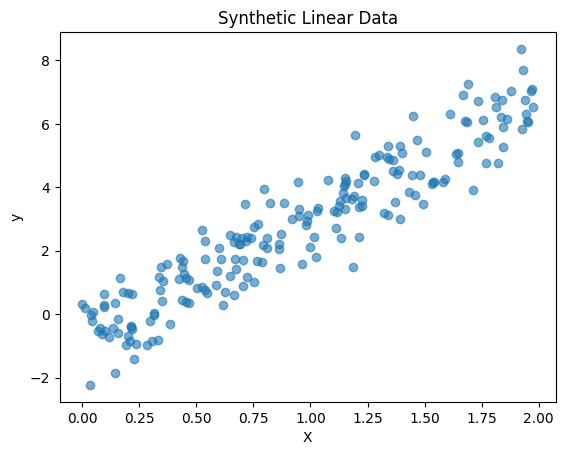

In [ ]:
np.random.seed(int(time())) # time seed for reproducibility
n_samples = 200
X_lin = 2 * np.random.rand(n_samples, 1)
true_slope = 4.0
true_intercept = -1.0
noise = np.random.randn(n_samples, 1) * 0.8
y_lin = true_slope * X_lin + true_intercept + noise

# Reshape for consistency
X_lin = X_lin.reshape(-1, 1)
y_lin = y_lin.reshape(-1, 1)

# visualize
plt.scatter(X_lin, y_lin, alpha=0.6)
plt.title('Synthetic Linear Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

## Linear Regression with Gradient Descent

We define a minimal LinearRegressionGD class:
- Parameters: learning rate (lr) and number of iterations (n_iters)
- Fit: initializes weights/bias and performs batch gradient descent to minimize MSE
- Predict: computes X·w + b

We'll train this model on the synthetic data, then evaluate its performance and compare learned parameters to the ground truth.

In [2]:
# 1.2 Linear Regression (Gradient Descent)
class LinearRegressionGD:
    def __init__(self, lr=0.05, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weight = None  # shape: (n_features, 1)
        self.bias = None

    def fit(self, X, y):
        """
        X: numpy array of shape (n_samples, n_features)
        y: numpy array of shape (n_samples, 1)
        """
        n_samples, n_features = X.shape
        # Initialize parameters
        self.weight = np.zeros((n_features, 1))
        self.bias = 0.0

        # Gradient descent loop
        for i in range(self.n_iters):
            y_pred = self.predict(X)

            dw = -2 * np.mean(X * (y - y_pred), axis=0).reshape(-1, 1)
            db = -2 * np.mean(y - y_pred)

            self.weight -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        """
        X: numpy array of shape (n_samples, n_features)
        returns: predictions of shape (n_samples, 1)
        """
        return X.dot(self.weight) + self.bias

## Train, predict, and evaluate

- Train the model on the synthetic data.
- Predict on the training set to inspect fit quality.
- Compute metrics:
  - Mean Squared Error (MSE)
  - R-squared (R^2)
- Optionally, you could also plot the learned regression line against the data for a visual check.

Linear Regression MSE: 0.6194705503461817
Linear Regression R^2: 0.8819451784566853


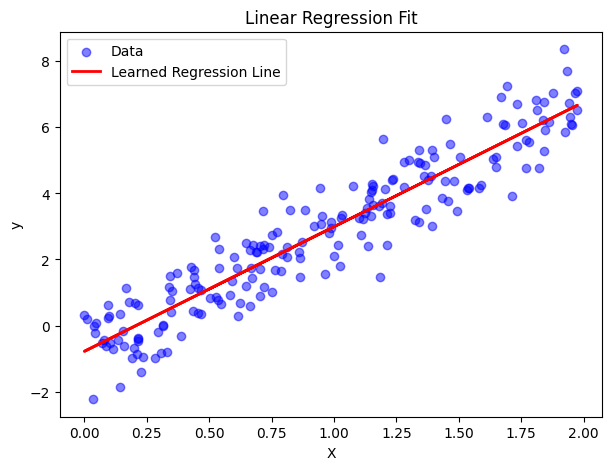

In [4]:
# Instantiate and train
model_lin = LinearRegressionGD(lr=0.05, n_iters=2000)
model_lin.fit(X_lin, y_lin)
y_pred_lin = model_lin.predict(X_lin)

def mean_squared_error(y_true, y_pred):
    # y_true, y_pred: shape (n_samples, 1)
    return np.mean((y_true - y_pred) ** 2)

def r2_score(y_true, y_pred):
    # y_true, y_pred: shape (n_samples, 1)
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Compute and print metrics
mse_value = mean_squared_error(y_lin, y_pred_lin)
r2_value = r2_score(y_lin, y_pred_lin)
print(f"Linear Regression MSE: {mse_value}")
print(f"Linear Regression R^2: {r2_value}")

# Plot the data and the learned regression line
plt.figure(figsize=(7, 5))
plt.scatter(X_lin, y_lin, color='blue', alpha=0.5, label='Data')
plt.plot(X_lin, y_pred_lin, color='red', linewidth=2, label='Learned Regression Line')
plt.title('Linear Regression Fit')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()